# **Data Science - Heart disease prediction**

**Name: Brian Schnabel ID: 323532762**

---


 **Name: Itay abramovich ID: 312466774**

**Summery of  Heart disease prediction**

# **Import libraries and read csv file:**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
%matplotlib inline


In [171]:
df = pd.read_csv('/content/Cardiovascular_Diseases_Risk_Prediction.csv')
df1=df
data = df.drop('Heart_Disease',axis=1)
print(data.head())
print(data.info())
print(data.describe())

   Patient_ID General_Health                  Checkup Exercise Skin_Cancer  \
0           1           Poor  Within the past 2 years       No          No   
1           2      Very Good     Within the past year       No          No   
2           3      Very Good     Within the past year      Yes          No   
3           4           Poor     Within the past year      Yes          No   
4           5           Good     Within the past year       No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0          150        32.66  14.54       

# **Encoding alphanumeric features**

In [172]:
# list of features
alpha_numeric_list = ["General_Health","Checkup", "Exercise", "Skin_Cancer",
                      "Other_Cancer", "Depression", "Diabetes", "Arthritis",
                      "Sex", "Age_Category", "Smoking_History","Heart_Disease"]
# Create a label encoder
le = LabelEncoder()

# Fit the encoder to the categorical features
for column in alpha_numeric_list:
    if column in df.columns:
      le.fit(df[column])
      df[column] = le.transform(df[column])

label_encoded=df
target_label_df = df['Heart_Disease']
target_label = 'Heart_Disease'
label_encoded.head()

,Patient_ID,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,2,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,3,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,4,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,5,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0


In [173]:

# One hot encode the features
one_hot_encoded = df1.copy()
for feature in alpha_numeric_list:
   one_hot_encoded = pd.get_dummies(one_hot_encoded, columns=[feature])

target_label_one_hot = df['Heart_Disease']
print("One Hot Encoded DataFrame:")
one_hot_encoded.head()




One Hot Encoded DataFrame:


,Patient_ID,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_0,General_Health_1,...,Age_Category_7,Age_Category_8,Age_Category_9,Age_Category_10,Age_Category_11,Age_Category_12,Smoking_History_0,Smoking_History_1,Heart_Disease_0,Heart_Disease_1
0,1,150,32.66,14.54,0,30,16,12,0,0,...,0,0,0,1,0,0,0,1,1,0
1,2,165,77.11,28.29,0,30,0,4,0,0,...,0,0,0,1,0,0,1,0,0,1
2,3,163,88.45,33.47,4,12,3,16,0,0,...,0,1,0,0,0,0,1,0,1,0
3,4,180,93.44,28.73,0,30,30,8,0,0,...,0,0,0,0,1,0,1,0,0,1
4,5,191,88.45,24.37,0,8,4,0,0,0,...,0,0,0,0,0,1,0,1,1,0


# **Plot the features**

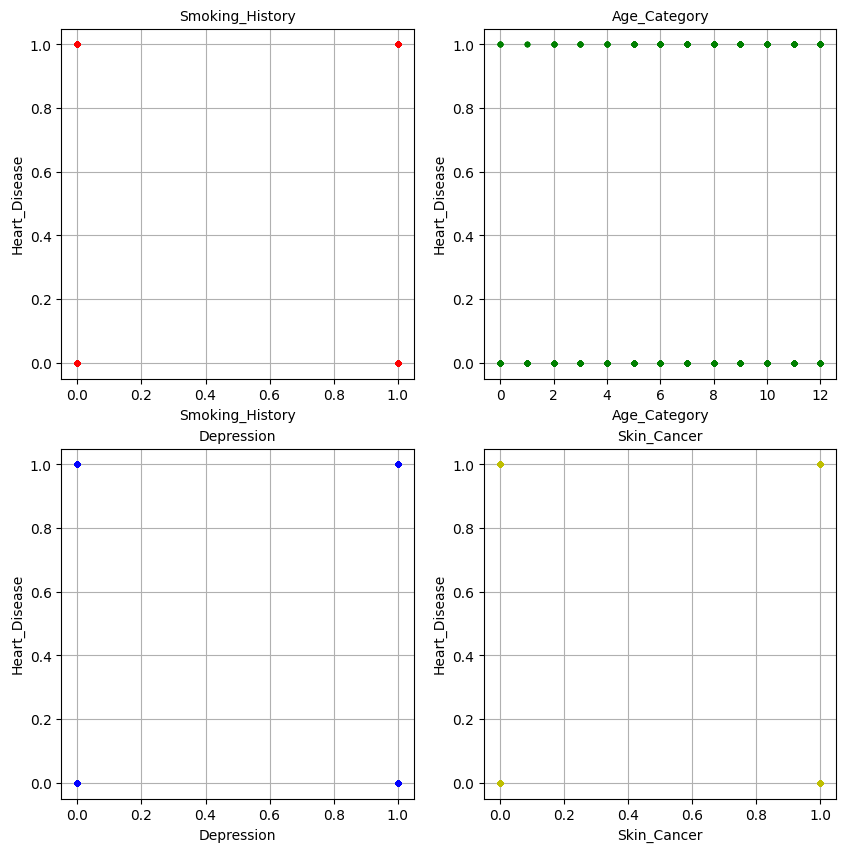

In [174]:

# Plot the distribution of values for each feature
X_set = label_encoded[['Smoking_History', 'Age_Category', 'Depression', 'Skin_Cancer','Exercise', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption']]
y_set = target_label_df
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(X_set['Smoking_History'], y_set, 'ro', markersize=3)
plt.title('Smoking_History',fontsize=10)
plt.ylabel('Heart_Disease')
plt.xlabel('Smoking_History')
plt.grid()


plt.subplot(222)
plt.plot(X_set['Age_Category'], y_set,'go',markersize=3)
plt.title('Age_Category',fontsize=10)
plt.ylabel('Heart_Disease')
plt.xlabel('Age_Category')
plt.grid()


plt.subplot(223)
plt.plot(X_set['Depression'],y_set,'bo',markersize=3)
plt.title('Depression',fontsize=10)
plt.ylabel('Heart_Disease')
plt.xlabel('Depression')
plt.grid()


plt.subplot(224)
plt.plot(X_set['Skin_Cancer'],y_set, 'yo',markersize=3)
plt.title('Skin_Cancer',fontsize=10)
plt.ylabel('Heart_Disease')
plt.xlabel('Skin_Cancer')
plt.grid()


* Age category graph - The graph shows that heart disease can come at all the ages.

* Smoking history - Heart disease is found in smoking and non smoking population.

* Depression - Heart disease is found in depressed and non depressed population.

* Skin cancer - Heart disease is found in people with or without skin cancer.


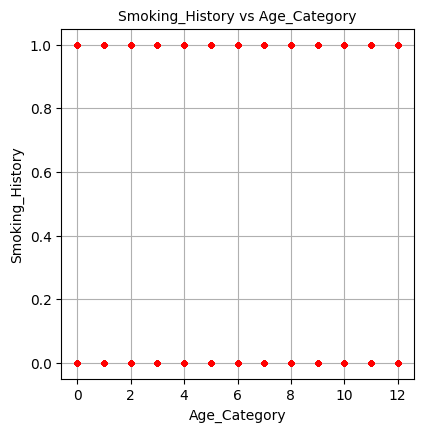

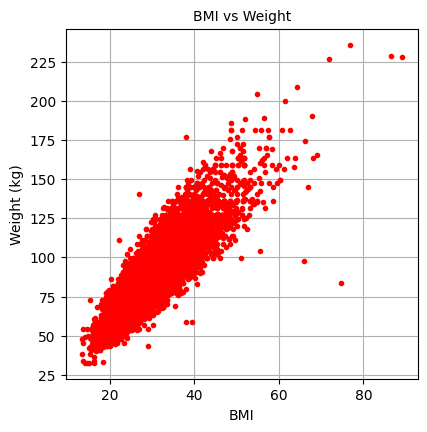

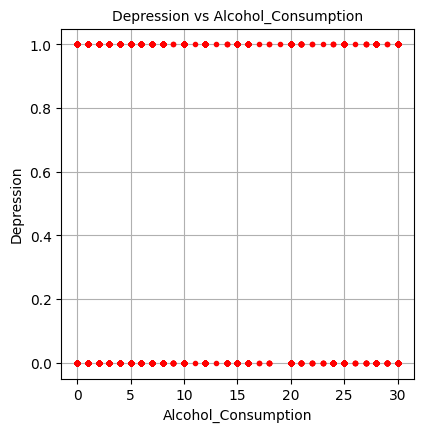

In [175]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(X_set['Age_Category'], X_set['Smoking_History'],  'ro', markersize=3)
plt.title('Smoking_History vs Age_Category',fontsize=10)
plt.ylabel('Smoking_History')
plt.xlabel('Age_Category')
plt.grid()


plt.figure(figsize=(10,10))
plt.subplot(222)
plt.plot(X_set['BMI'], X_set['Weight_(kg)'],  'ro', markersize=3)
plt.title('BMI vs Weight',fontsize=10)
plt.ylabel('Weight (kg)')
plt.xlabel('BMI')
plt.grid()

plt.figure(figsize=(10,10))
plt.subplot(223)
plt.plot(X_set['Alcohol_Consumption'], X_set['Depression'],  'ro', markersize=3)
plt.title('Depression vs Alcohol_Consumption',fontsize=10)
plt.ylabel('Depression')
plt.xlabel('Alcohol_Consumption')
plt.grid()

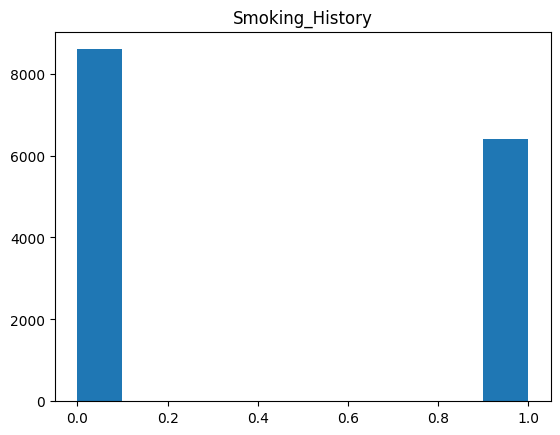

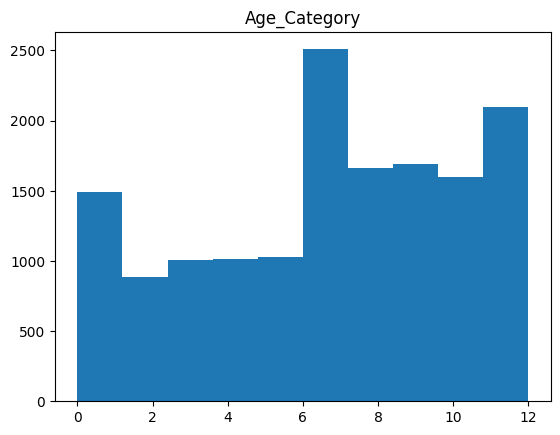

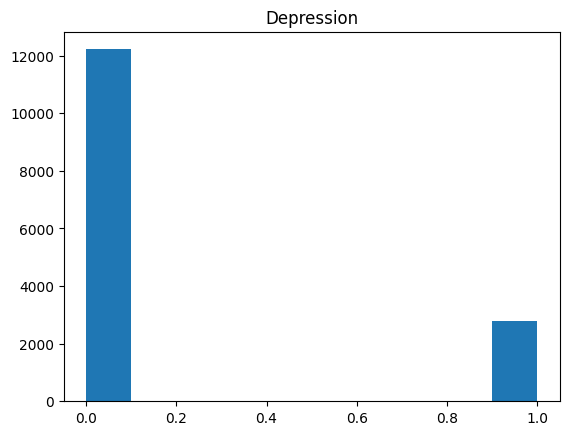

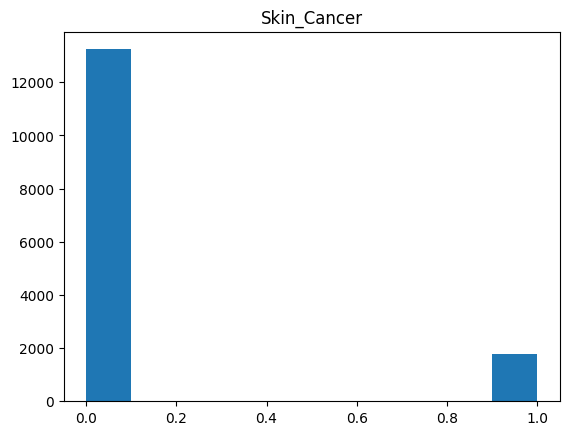

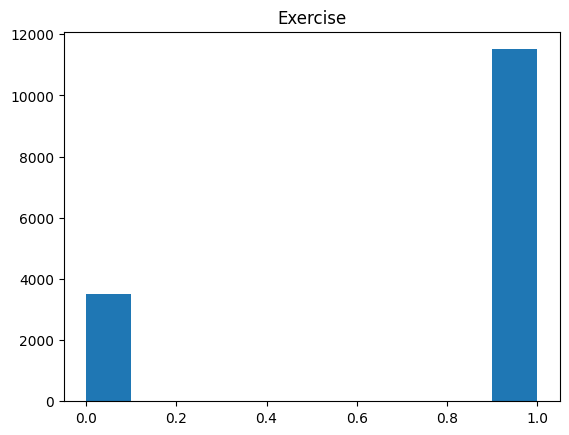

In [176]:
for feature in ['Smoking_History', 'Age_Category', 'Depression', 'Skin_Cancer','Exercise']:
    plt.hist(label_encoded[feature])
    plt.title(feature)
    plt.show()


# **Fill missing values:**

**Check for missing values and their precentage**

In [177]:
# Check for missing values
missing_values = label_encoded.isna().sum()

# Print the percentage of missing values for each feature
for feature in label_encoded.columns:
    missing_precentage = (missing_values[feature] / len(label_encoded)) * 100
    print(feature,'=', "%.2f" % missing_precentage , '%')

Patient_ID = 0.00 %
General_Health = 0.00 %
Checkup = 0.00 %
Exercise = 0.00 %
Heart_Disease = 0.00 %
Skin_Cancer = 0.00 %
Other_Cancer = 0.00 %
Depression = 0.00 %
Diabetes = 0.00 %
Arthritis = 0.00 %
Sex = 0.00 %
Age_Category = 0.00 %
Height_(cm) = 0.00 %
Weight_(kg) = 0.00 %
BMI = 0.00 %
Smoking_History = 0.00 %
Alcohol_Consumption = 0.00 %
Fruit_Consumption = 0.00 %
Green_Vegetables_Consumption = 0.00 %
FriedPotato_Consumption = 0.00 %


**Fill the mising values (There are no missing values in the data)**

In [178]:
# List of columns to consider
columns_to_fill = label_encoded.columns[label_encoded.isna().any()]

for column in columns_to_fill:

  if column in alpha_numeric_list:
    label_encoded[column].fillna(label_encoded[column].mode()[0],inplace=True)

  else:
    label_encoded[column].fillna(label_encoded[column].mean(),inplace=True)




**Check for missing valuesd again**

In [179]:
# Check for missing values
missing_values = label_encoded.isna().sum()
missing_values.sort_values(ascending=True)

# Print the percentage of missing values for each feature
for feature in label_encoded.columns:
    missing_precentage = (missing_values[feature] / len(label_encoded)) * 100
    print(feature,'=', "%.2f" % missing_precentage , '%')

Patient_ID = 0.00 %
General_Health = 0.00 %
Checkup = 0.00 %
Exercise = 0.00 %
Heart_Disease = 0.00 %
Skin_Cancer = 0.00 %
Other_Cancer = 0.00 %
Depression = 0.00 %
Diabetes = 0.00 %
Arthritis = 0.00 %
Sex = 0.00 %
Age_Category = 0.00 %
Height_(cm) = 0.00 %
Weight_(kg) = 0.00 %
BMI = 0.00 %
Smoking_History = 0.00 %
Alcohol_Consumption = 0.00 %
Fruit_Consumption = 0.00 %
Green_Vegetables_Consumption = 0.00 %
FriedPotato_Consumption = 0.00 %


# **Correlation matrix**

<Axes: >

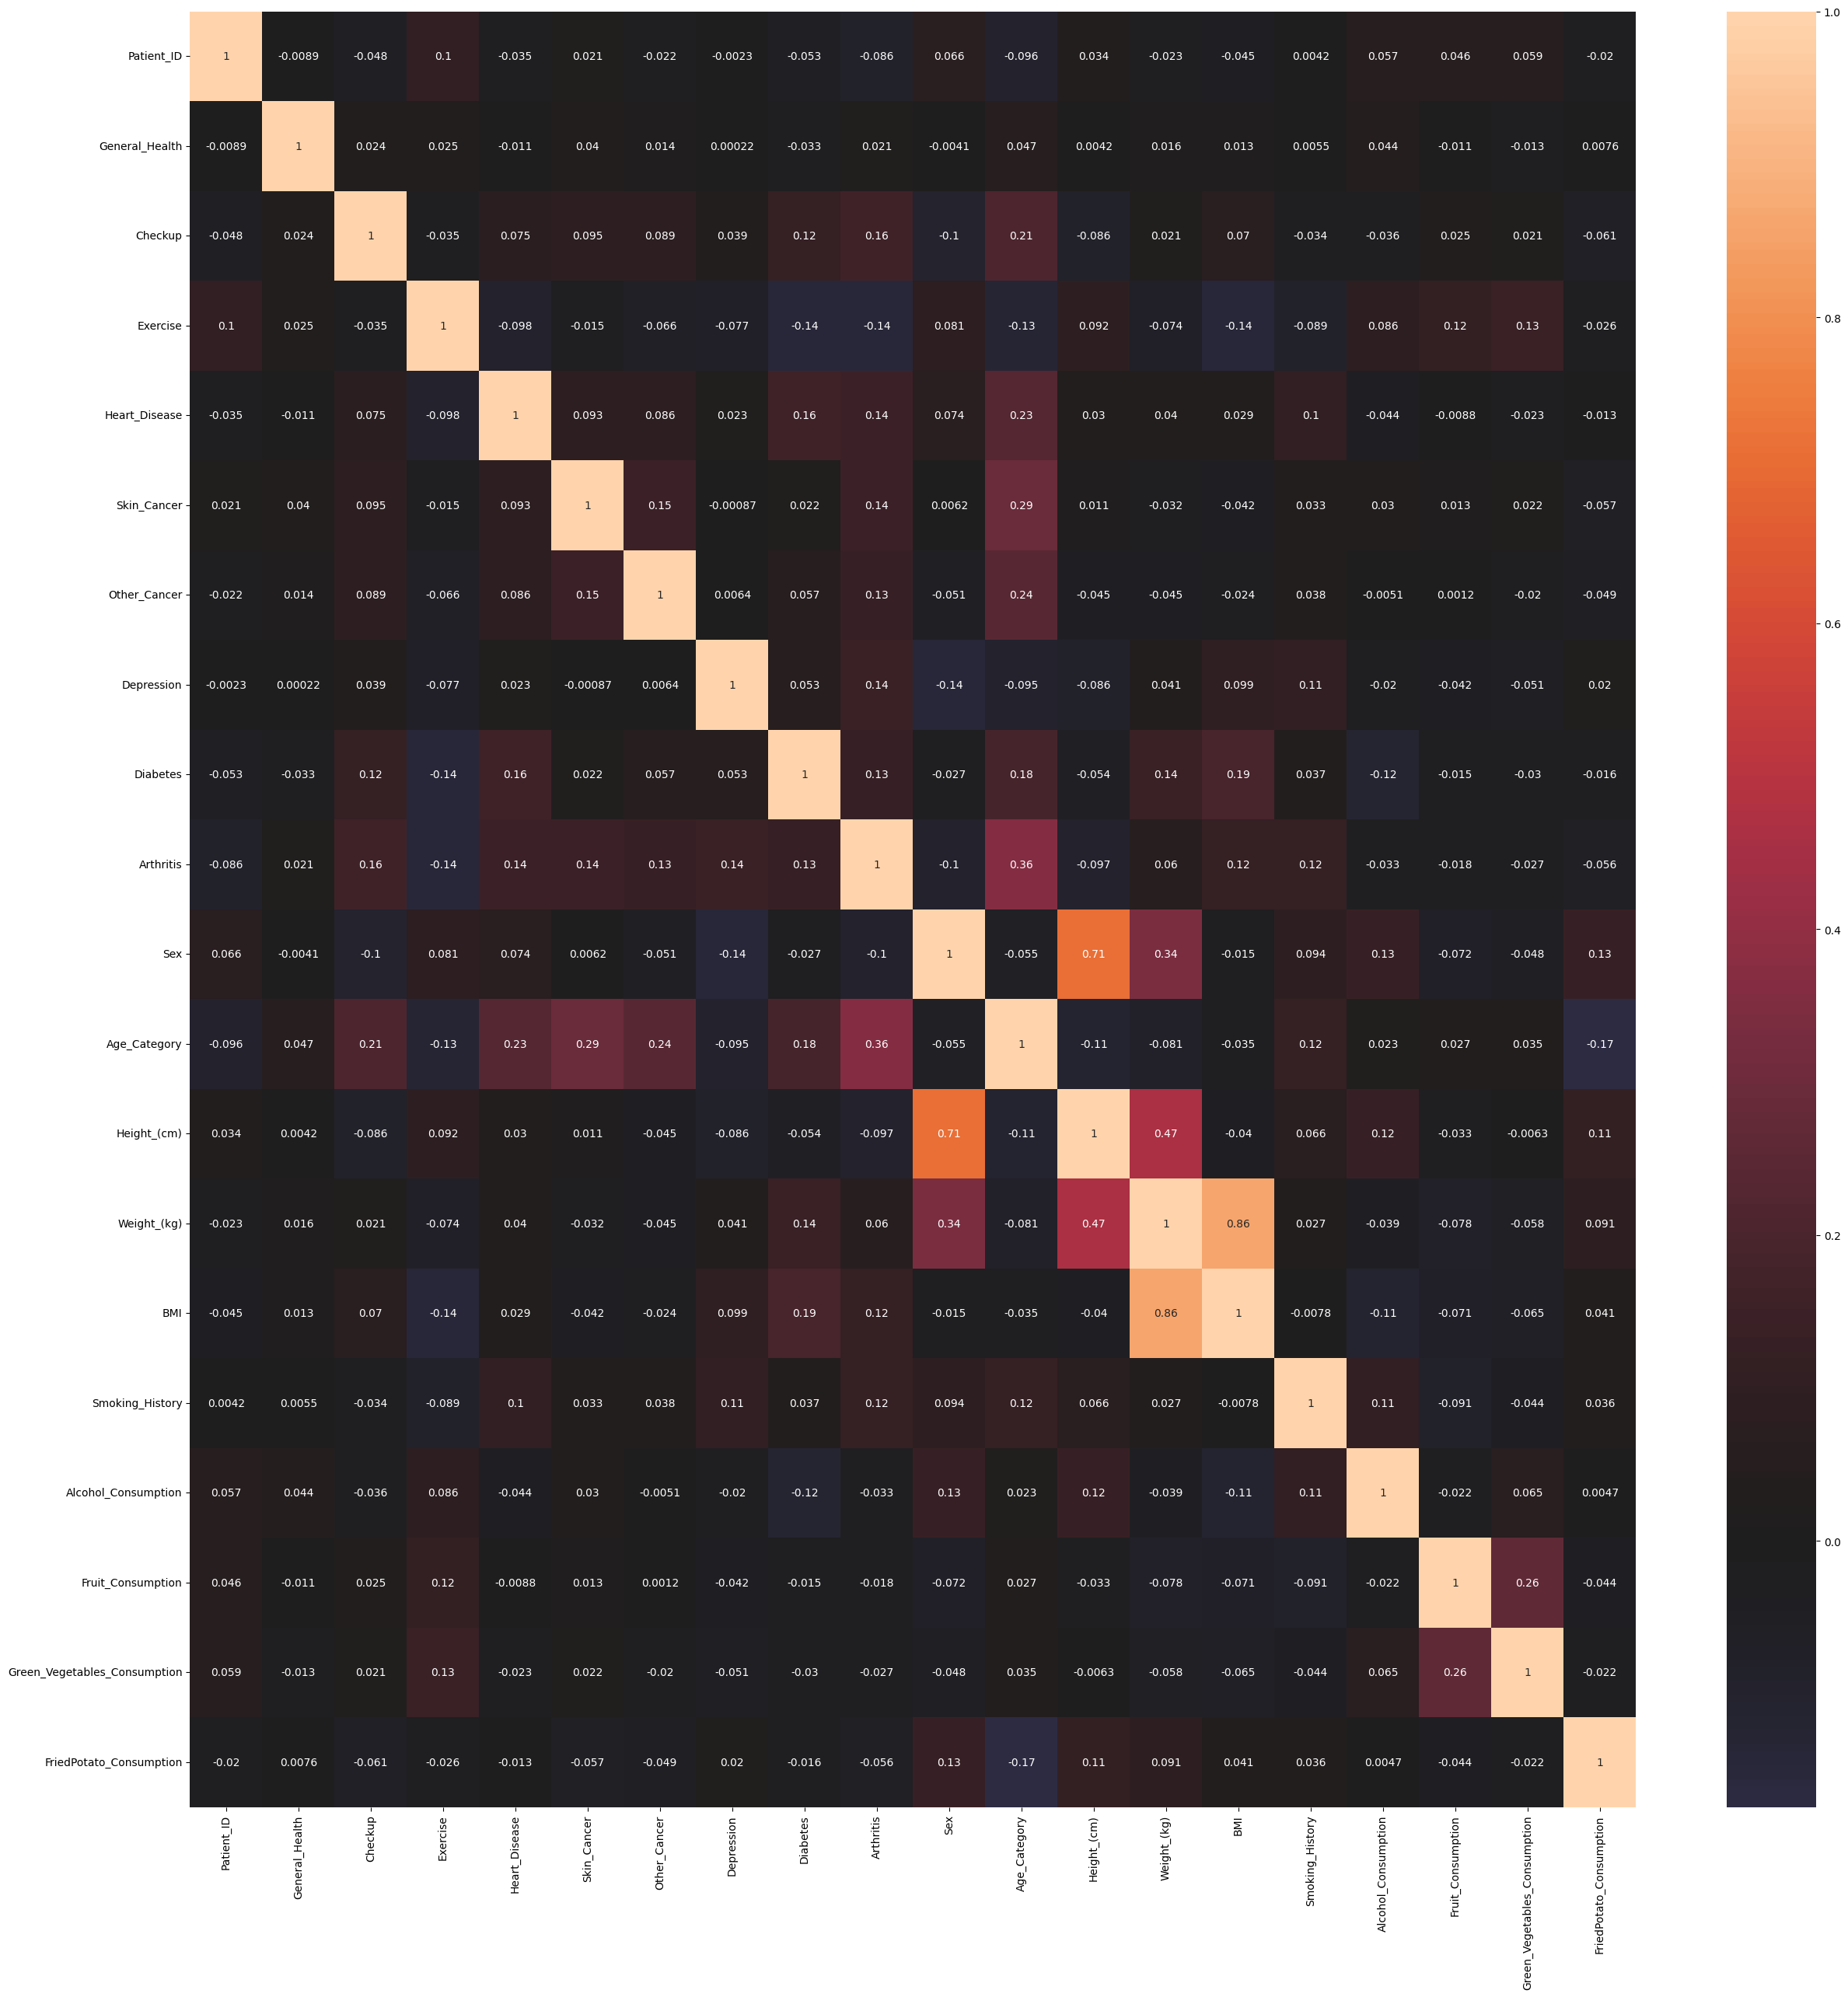

In [180]:
# Plot the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(label_encoded.corr(),center=0, annot=True)


In [181]:
# Get the correlations with the target label
corr_mat = df.corr()
correlations_with_target = corr_mat[target_label]

# Sort the correlations in descending order
sorted_correlations = correlations_with_target.sort_values(ascending=False)

# Print the labels with the highest correlations to the target label
print("Labels with the highest correlation to the target label:")
for label, correlation in sorted_correlations.items():
    if label != target_label:
        print(f"{label}: {correlation:.2f}")

Labels with the highest correlation to the target label:
Age_Category: 0.23
Diabetes: 0.16
Arthritis: 0.14
Smoking_History: 0.10
Skin_Cancer: 0.09
Other_Cancer: 0.09
Checkup: 0.08
Sex: 0.07
Weight_(kg): 0.04
Height_(cm): 0.03
BMI: 0.03
Depression: 0.02
Fruit_Consumption: -0.01
General_Health: -0.01
FriedPotato_Consumption: -0.01
Green_Vegetables_Consumption: -0.02
Patient_ID: -0.04
Alcohol_Consumption: -0.04
Exercise: -0.10


From the results of the correlation list we can assume that under the score of
 ~+-0.05 the data isn't relevant and has no correlation with the subscribers.

Therefore only the labes:
* Age_Category: 0.23
* Diabetes: 0.16
* Arthritis: 0.14
* Exercise: -0.10
* Skin_Cancer: 0.09
* Other_Cancer: 0.09
* Checkup: 0.08
* Sex: 0.07
* Exercise: -0.10

are relevant and have correlation to the target label


# **Clean unessecary labels**

**Unique alphanumeric labels**

In [182]:
#Checking for unique values in alphanumeric features

for col in alpha_numeric_list:
    print(col,' has ',label_encoded[col].unique().shape[0], ' unique values')

General_Health  has  5  unique values
Checkup  has  5  unique values
Exercise  has  2  unique values
Skin_Cancer  has  2  unique values
Other_Cancer  has  2  unique values
Depression  has  2  unique values
Diabetes  has  4  unique values
Arthritis  has  2  unique values
Sex  has  2  unique values
Age_Category  has  13  unique values
Smoking_History  has  2  unique values
Heart_Disease  has  2  unique values


**There isn't many unique items in the alphanumeric features therefor there is nothing to eliminate.**

**There are non alphanumeric labes which we can say are useless.
for example the 'Patient_ID' label for sure doesnt indicate anything.**

In [183]:
label_encoded.drop(['Patient_ID'],axis=1,inplace=True)
label_encoded.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0


**Now we will clean the data and drop the uninteresting columns with no correlation**



In [184]:
for label, correlation in sorted_correlations.items():
    if label != target_label and abs(correlation) < 0.05 and label in label_encoded.columns:
      label_encoded.drop(label,axis=1,inplace=True)

print(label_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Checkup          14999 non-null  int64
 1   Exercise         14999 non-null  int64
 2   Heart_Disease    14999 non-null  int64
 3   Skin_Cancer      14999 non-null  int64
 4   Other_Cancer     14999 non-null  int64
 5   Diabetes         14999 non-null  int64
 6   Arthritis        14999 non-null  int64
 7   Sex              14999 non-null  int64
 8   Age_Category     14999 non-null  int64
 9   Smoking_History  14999 non-null  int64
dtypes: int64(10)
memory usage: 1.1 MB
None


In [185]:
label_encoded.head()

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,2,0,0,0,0,0,1,0,10,1
1,4,0,1,0,0,2,0,0,10,0
2,4,1,0,0,0,2,0,0,8,0
3,4,1,1,0,0,2,0,1,11,0
4,4,0,0,0,0,0,0,1,12,1


# **Module Sets**

In [186]:
# Split the data into features and target
y = label_encoded[target_label]
x = label_encoded.copy()
x.drop(target_label,axis=1,inplace=True)

# Split the data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

# Print the sets
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

print(x_train.info())
print(y_train.info())


x_train: (10499, 9)
x_val: (2250, 9)
x_test: (2250, 9)
y_train: (10499,)
y_val: (2250,)
y_test: (2250,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 3502 to 13349
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Checkup          10499 non-null  int64
 1   Exercise         10499 non-null  int64
 2   Skin_Cancer      10499 non-null  int64
 3   Other_Cancer     10499 non-null  int64
 4   Diabetes         10499 non-null  int64
 5   Arthritis        10499 non-null  int64
 6   Sex              10499 non-null  int64
 7   Age_Category     10499 non-null  int64
 8   Smoking_History  10499 non-null  int64
dtypes: int64(9)
memory usage: 820.2 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 10499 entries, 3502 to 13349
Series name: Heart_Disease
Non-Null Count  Dtype
--------------  -----
10499 non-null  int64
dtypes: int64(1)
memory usage: 164.0 KB
None


**יצירת טבלה להשוואת תוצאות**

In [187]:
scores = pd.DataFrame(columns=['train accuracy','validation accuracy'],index=['tree','xgboost'])
print(scores)

        train accuracy validation accuracy
tree               NaN                 NaN
xgboost            NaN                 NaN


# **Decsision tree**

**Train the module**

In [188]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

scores.at['tree','train accuracy'] = tree.score(x_train, y_train)
scores.at['tree','validation accuracy'] = tree.score(x_val, y_val)
print(scores)


        train accuracy validation accuracy
tree          0.926755            0.897333
xgboost            NaN                 NaN


**Confusion matrix**

<Axes: >

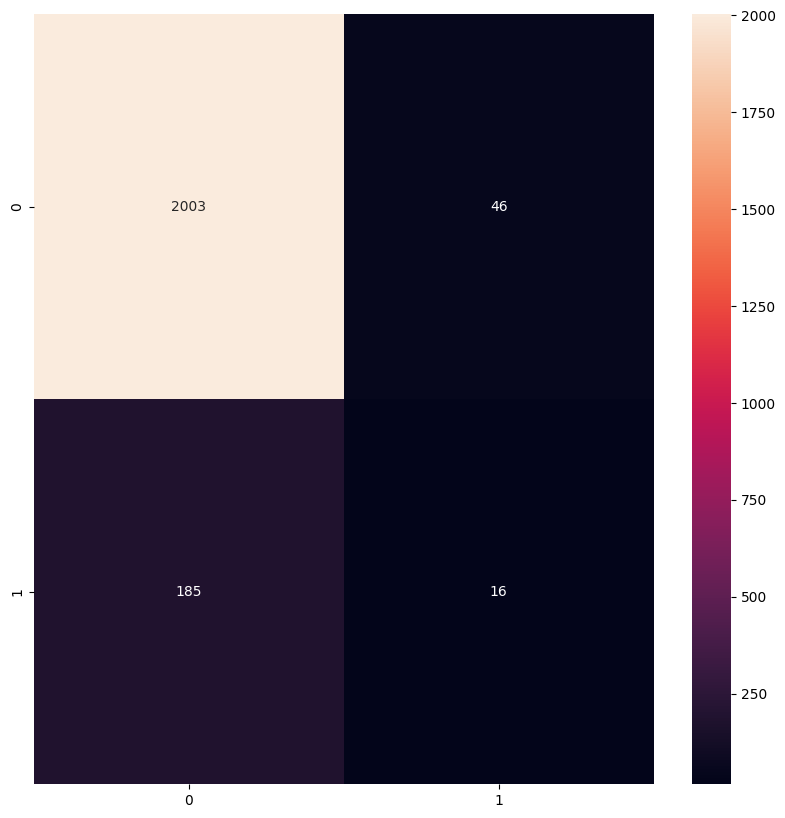

In [189]:
plt.figure(figsize=(10,10))
conf = confusion_matrix(y_val, tree.predict(x_val))
sns.heatmap(conf, annot=True, fmt="d")

**Search for hyper parameters**

In [190]:
# from tqdm import tqdm

best_params = None
best_tree = None
best_accuracy = None
for max_depth in tqdm(range(2,15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            for criterion in ('gini', 'entropy'):
                params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
                tree = DecisionTreeClassifier(**params)
                tree.fit(x_train, y_train)
                accuracy = tree.score(x_val, y_val)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_tree = tree
                    best_accuracy = accuracy

print(f'Best accuracy: {best_accuracy}')
print(f'Best params: {best_params}')


scores.at['tree_opt','train accuracy'] = best_tree.score(x_train, y_train)
scores.at['tree_opt','validation accuracy'] = best_tree.score(x_val, y_val)
print(scores)

100%|██████████| 13/13 [00:24<00:00,  1.87s/it]

Best accuracy: 0.9115555555555556
Best params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4}
         train accuracy validation accuracy
tree           0.926755            0.897333
xgboost             NaN                 NaN
tree_opt       0.916373            0.911556


# **XGBoost**

**XGBoost model need the array of y_train to start at 0 so we first encode the target label, we train the model and then we decode the data to see results**

In [191]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

y_train = le.fit_transform(y_train)

XGB = XGBClassifier()
XGB.fit(x_train, y_train)

y_pred_train = XGB.predict(x_train)
y_pred_train = le.inverse_transform(y_pred_train)
train_predictions = [round(value) for value in y_pred_train]

y_pred_val = XGB.predict(x_val)
y_pred_val = le.inverse_transform(y_pred_val)
val_predictions = [round(value) for value in y_pred_val]

y_train = le.inverse_transform(y_train)

In [192]:
scores.at['xgboost','train accuracy'] = accuracy_score(y_train, train_predictions)
scores.at['xgboost','validation accuracy'] = accuracy_score(y_val, val_predictions)
print(scores)

         train accuracy validation accuracy
tree           0.926755            0.897333
xgboost        0.919707            0.907111
tree_opt       0.916373            0.911556


**Confusion matrix**

<Axes: >

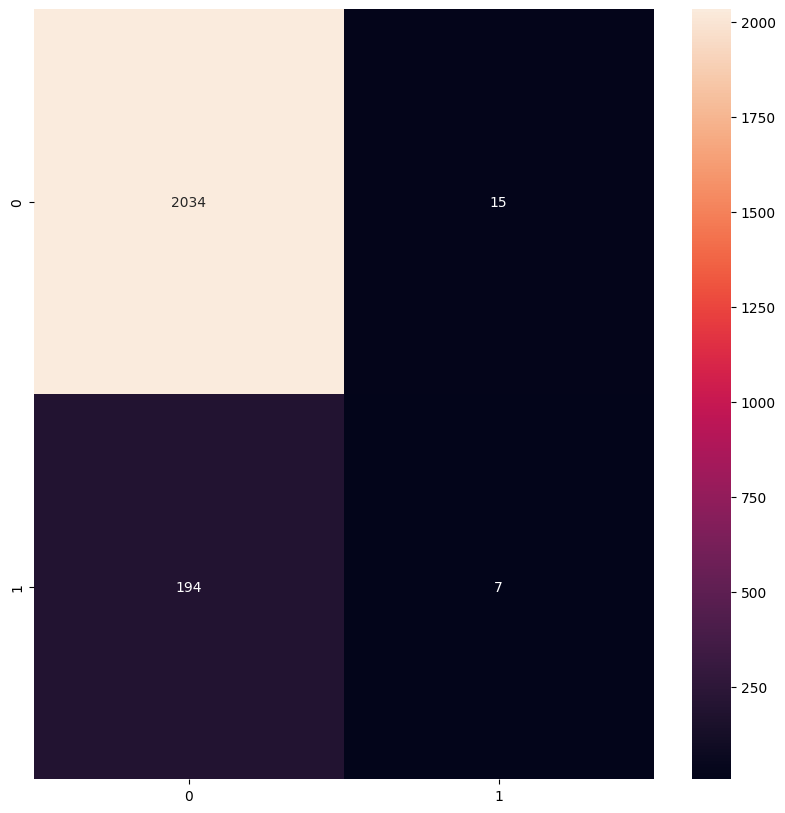

In [193]:
plt.figure(figsize=(10,10))
conf = confusion_matrix(y_val, val_predictions)
sns.heatmap(conf, annot=True, fmt="d")

**XGBoost Hyper-params**

In [194]:
best_params = None
best_tree = None
best_accuracy = None
y_train = le.fit_transform(y_train)

for max_depth in tqdm(range(2,15)):
    for num_est in [200,500,1000,1500]:
                params = {'max_depth': max_depth, 'n_estimators': num_est}
                xgb = XGBClassifier(**params)
                XGB.fit(x_train, y_train)
                y_pred_val = XGB.predict(x_val)
                y_pred_val = le.inverse_transform(y_pred_val)
                val_predictions = [round(value) for value in y_pred_val]
                accuracy = accuracy_score(y_val, val_predictions)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_tree = tree
                    best_accuracy = accuracy

print(f'Best accuracy: {best_accuracy}')
print(f'Best params: {best_params}')


xgb = XGBClassifier(**best_params)
XGB.fit(x_train, y_train)


y_pred_train = XGB.predict(x_train)
y_pred_train = le.inverse_transform(y_pred_train)
train_predictions = [round(value) for value in y_pred_train]

y_pred_val = XGB.predict(x_val)
y_pred_val = le.inverse_transform(y_pred_val)
val_predictions = [round(value) for value in y_pred_val]

y_train = le.inverse_transform(y_train)
scores.at['xgboost_opt','train accuracy'] = accuracy_score(y_train, train_predictions)
scores.at['xgboost_opt','validation accuracy'] = accuracy_score(y_val, val_predictions)

100%|██████████| 13/13 [00:42<00:00,  3.26s/it]


Best accuracy: 0.9071111111111111
Best params: {'max_depth': 2, 'n_estimators': 200}


# **Scores**

In [195]:
scores

,train accuracy,validation accuracy
tree,0.926755,0.897333
xgboost,0.919707,0.907111
tree_opt,0.916373,0.911556
xgboost_opt,0.919707,0.907111


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(scores, *['train accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(scores, *['validation accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(scores, *['train accuracy', 'validation accuracy'], **{})
chart